In [1]:
%load_ext autoreload
%autoreload 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
import ControlBurn as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.linear_model import LogisticRegression as lr
from sklearn.linear_model import RidgeClassifier as rc
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [3]:
df_rain = pd.read_csv('datasets/adult_clean.csv')
rain_feats = df_rain.columns.values
rain_x = df_rain.loc[:, df_rain.columns != "income_>50k"]
rain_x = df_rain.loc[:, df_rain.columns != "Unnamed: 0"]
rain_y = df_rain.loc[:, df_rain.columns == "income_>50k"]
rain_x_tr, rain_x_te, rain_y_tr, rain_y_te = train_test_split(rain_x, rain_y, test_size=0.2)

In [4]:
# rain_norm_x = rain_x - rain_x.min()
# rain_norm_x /= (rain_norm_x.max() - rain_norm_x.min())
rain_norm_x = rain_x - rain_x.mean()
rain_norm_x_tr, rain_norm_x_te, rain_norm_y_tr, rain_norm_y_te = train_test_split(rain_norm_x, rain_y, test_size=0.2)

In [6]:
df_rain['income_>50k'].max()

1

In [7]:
rain_x.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_>50k
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
rain_norm_x.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_>50k
0,0.356415,-112148.134597,2.921911,1094.932374,-87.502314,-0.422382,-0.057307,-0.029319,-0.064207,-0.000205,...,-0.003767,-0.00043,-0.002355,-0.001331,-0.000614,-0.000553,0.102576,-0.001761,-0.000471,-0.239282
1,11.356415,-106353.134597,2.921911,-1079.067626,-87.502314,-27.422382,-0.057307,-0.029319,-0.064207,-0.000205,...,-0.003767,-0.00043,-0.002355,-0.001331,-0.000614,-0.000553,0.102576,-0.001761,-0.000471,-0.239282
2,-0.643585,25981.865403,-1.078089,-1079.067626,-87.502314,-0.422382,-0.057307,-0.029319,-0.064207,-0.000205,...,-0.003767,-0.00043,-0.002355,-0.001331,-0.000614,-0.000553,0.102576,-0.001761,-0.000471,-0.239282
3,14.356415,45056.865403,-3.078089,-1079.067626,-87.502314,-0.422382,-0.057307,-0.029319,-0.064207,-0.000205,...,-0.003767,-0.00043,-0.002355,-0.001331,-0.000614,-0.000553,0.102576,-0.001761,-0.000471,-0.239282
4,-10.643585,148744.865403,2.921911,-1079.067626,-87.502314,-0.422382,-0.057307,-0.029319,-0.064207,-0.000205,...,-0.003767,-0.00043,-0.002355,-0.001331,-0.000614,-0.000553,-0.897424,-0.001761,-0.000471,-0.239282


In [9]:
rain_norm_x.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_>50k
count,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,...,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04,4.884200e+04
mean,3.128355e-15,-6.025509e-12,-1.460597e-16,2.824458e-13,-1.243893e-14,3.654403e-16,-4.037009e-18,-1.229288e-17,-7.055674e-18,-3.182327e-20,...,-4.728029e-19,-1.068353e-19,-2.545862e-19,1.182007e-19,4.023371e-19,7.273891e-20,-3.331442e-17,1.363854e-19,4.773491e-20,2.058511e-17
std,1.371051e+01,1.056040e+05,2.570973e+00,7.452019e+03,4.030046e+02,1.239144e+01,2.324311e-01,1.687009e-01,2.451239e-01,1.430748e-02,...,6.126283e-02,2.073118e-02,4.846685e-02,3.645652e-02,2.477621e-02,2.350550e-02,3.034069e-01,4.192512e-02,2.169549e-02,4.266494e-01
min,-2.164359e+01,-1.773791e+05,-9.078089e+00,-1.079068e+03,-8.750231e+01,-3.942238e+01,-5.730724e-02,-2.931903e-02,-6.420703e-02,-2.047418e-04,...,-3.767249e-03,-4.299578e-04,-2.354531e-03,-1.330822e-03,-6.142255e-04,-5.528029e-04,-8.974243e-01,-1.760780e-03,-4.709062e-04,-2.392818e-01
25%,-1.064359e+01,-7.211363e+04,-1.078089e+00,-1.079068e+03,-8.750231e+01,-4.223824e-01,-5.730724e-02,-2.931903e-02,-6.420703e-02,-2.047418e-04,...,-3.767249e-03,-4.299578e-04,-2.354531e-03,-1.330822e-03,-6.142255e-04,-5.528029e-04,1.025757e-01,-1.760780e-03,-4.709062e-04,-2.392818e-01
50%,-1.643585e+00,-1.151963e+04,-7.808853e-02,-1.079068e+03,-8.750231e+01,-4.223824e-01,-5.730724e-02,-2.931903e-02,-6.420703e-02,-2.047418e-04,...,-3.767249e-03,-4.299578e-04,-2.354531e-03,-1.330822e-03,-6.142255e-04,-5.528029e-04,1.025757e-01,-1.760780e-03,-4.709062e-04,-2.392818e-01
75%,9.356415e+00,4.797787e+04,1.921911e+00,-1.079068e+03,-8.750231e+01,4.577618e+00,-5.730724e-02,-2.931903e-02,-6.420703e-02,-2.047418e-04,...,-3.767249e-03,-4.299578e-04,-2.354531e-03,-1.330822e-03,-6.142255e-04,-5.528029e-04,1.025757e-01,-1.760780e-03,-4.709062e-04,-2.392818e-01
max,5.135641e+01,1.300736e+06,5.921911e+00,9.891993e+04,4.268498e+03,5.857762e+01,9.426928e-01,9.706810e-01,9.357930e-01,9.997953e-01,...,9.962328e-01,9.995700e-01,9.976455e-01,9.986692e-01,9.993858e-01,9.994472e-01,1.025757e-01,9.982392e-01,9.995291e-01,7.607182e-01


In [10]:
rain_feats

array(['Unnamed: 0', 'age', 'fnlwgt', 'education_num', 'capital_gain',
       'capital_loss', 'hours_per_week', 'workclass_ ?',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital_status_ Divorced', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ ?',
       'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupat

In [11]:
U, S, V = np.linalg.svd(rain_x_tr[:5000])
Un, Sn, Vn = np.linalg.svd(rain_norm_x_tr[:5000])

[1.51196598e+07 5.54402816e+05 2.83490442e+04 2.16733261e+03
 8.92671305e+02 2.18429100e+02 6.31818199e+01 4.15984949e+01
 3.77659281e+01 3.35971604e+01 3.08962903e+01 2.81827479e+01
 2.58660220e+01 2.51933284e+01 2.40649657e+01 2.36754224e+01
 2.32632869e+01 2.27484436e+01 2.26402804e+01 2.08589449e+01
 2.01533429e+01 1.88360599e+01 1.73655648e+01 1.65957215e+01
 1.61605200e+01 1.55891260e+01 1.50884759e+01 1.40317621e+01
 1.34433018e+01 1.32961411e+01 1.28575043e+01 1.25300666e+01
 1.21705931e+01 1.19729953e+01 1.15543642e+01 1.00198043e+01
 9.59163556e+00 9.26497530e+00 8.65527047e+00 7.63479097e+00
 6.69754409e+00 6.03914149e+00 5.35424094e+00 4.57881962e+00
 4.56594271e+00 4.21263714e+00 4.07695240e+00 3.92450832e+00
 3.80705791e+00 3.70811933e+00 3.52327132e+00 3.36202128e+00
 3.33218772e+00 3.14831707e+00 3.10470798e+00 2.97561068e+00
 2.92391540e+00 2.85253753e+00 2.81922859e+00 2.80426847e+00
 2.79652311e+00 2.69455207e+00 2.62900647e+00 2.61429134e+00
 2.46211369e+00 2.398043

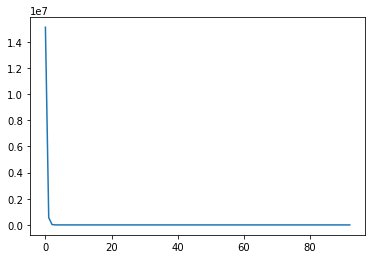

In [12]:
print(S)
plt.plot(S)
# demonstrate features selected by PCA would do poorly in RF but do well with lasso
# normalize every feature and try again

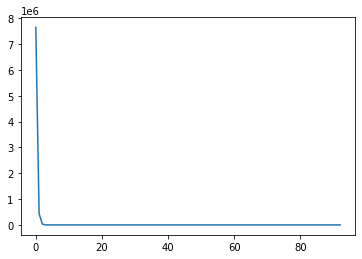

In [13]:
Sn
plt.plot(Sn)

In [14]:
clf = lr(penalty='l2').fit(rain_x_tr, rain_y_tr)
print(clf.score(rain_x_te, rain_y_te)) # clf.score(rain_x_te_true, rain_y_te_true), clf.score(rain_x_te_false, rain_y_te_false))
print('Coefficients:', clf.coef_)

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7961920360323472
Coefficients: [[-7.79913075e-03 -3.57320697e-06 -1.81826793e-03  3.49345070e-04
   7.49980128e-04 -8.38756115e-03 -6.96975574e-05  1.43991499e-05
  -2.45592350e-06 -3.62508397e-07 -3.12104408e-04  3.74942101e-05
  -2.30807274e-05 -1.04100353e-05 -5.04332906e-07 -1.67244406e-04
   4.11608028e-07  3.74600322e-04 -1.54316219e-05 -4.74016243e-04
  -4.13794619e-05 -4.36623304e-05 -7.00600658e-05 -1.02073177e-04
   2.84958094e-08 -4.78842125e-05  1.08691793e-04 -3.71432681e-05
  -5.16772087e-05 -5.98802394e-05 -1.49436477e-04 -7.93096266e-06
   8.84748720e-05  5.53606544e-06 -1.86886691e-05  1.01874097e-06
  -2.56978203e-05  3.34398138e-04 -3.12824676e-04 -4.37012097e-05
  -2.43917639e-04 -1.46474197e-04  4.57974503e-05 -1.54305133e-05
  -1.17099634e-05 -7.58263462e-05 -7.78273283e-06 -2.55972577e-04
  -3.73982893e-04  7.26075992e-06 -3.08471881e-06  2.20083291e-07
   1.19962358e-06 -4.01071107e-08 -2.47247091e-06  4.51144130e-07
  -2.53539354e-06 -9.92405769e-07 -3.219638

In [15]:
clf = lr(penalty='l1', solver='liblinear').fit(rain_x_tr, rain_y_tr)
print(clf.score(rain_x_te, rain_y_te))# , clf.score(rain_x_te_true, rain_y_te_true), clf.score(rain_x_te_false, rain_y_te_false))
print('Coefficients:', clf.coef_)

1.0
Coefficients: [[-4.84658539e-02 -4.73364701e-06 -1.46128550e-01  6.19234511e-05
   2.49861491e-04 -5.30296795e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.56899342e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.43448614e-01
  -3.67142363e-01 -1.34404055e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [16]:
# run pca for different numbers of output features, see how loss changes
# comparison with lasso (ridge)
# and RF to see loss progression
rain_norm_x_tr.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_>50k
count,39073.000000,3.907300e+04,39073.000000,39073.000000,39073.000000,39073.000000,39073.000000,39073.000000,39073.000000,39073.000000,...,39073.000000,39073.000000,39073.000000,39073.000000,39073.000000,39073.000000,39073.000000,39073.000000,39073.000000,39073.000000
mean,0.007555,4.274477e+02,-0.004124,2.384092,-0.554831,0.002156,0.000098,0.000471,0.000160,-0.000026,...,-0.000056,0.000056,0.000256,-0.000026,-0.000102,0.000036,0.000408,0.000108,0.000041,-0.000216
std,13.720978,1.060692e+05,2.572725,7465.292432,402.589182,12.402983,0.232619,0.170011,0.245408,0.013384,...,0.060806,0.022046,0.051027,0.036105,0.022619,0.024255,0.302873,0.043184,0.022619,0.426518
min,-21.643585,-1.773791e+05,-9.078089,-1079.067626,-87.502314,-39.422382,-0.057307,-0.029319,-0.064207,-0.000205,...,-0.003767,-0.000430,-0.002355,-0.001331,-0.000614,-0.000553,-0.897424,-0.001761,-0.000471,-0.239282
25%,-10.643585,-7.186213e+04,-1.078089,-1079.067626,-87.502314,-0.422382,-0.057307,-0.029319,-0.064207,-0.000205,...,-0.003767,-0.000430,-0.002355,-0.001331,-0.000614,-0.000553,0.102576,-0.001761,-0.000471,-0.239282
50%,-1.643585,-1.144913e+04,-0.078089,-1079.067626,-87.502314,-0.422382,-0.057307,-0.029319,-0.064207,-0.000205,...,-0.003767,-0.000430,-0.002355,-0.001331,-0.000614,-0.000553,0.102576,-0.001761,-0.000471,-0.239282
75%,9.356415,4.867787e+04,1.921911,-1079.067626,-87.502314,4.577618,-0.057307,-0.029319,-0.064207,-0.000205,...,-0.003767,-0.000430,-0.002355,-0.001331,-0.000614,-0.000553,0.102576,-0.001761,-0.000471,-0.239282
max,51.356415,1.300736e+06,5.921911,98919.932374,4268.497686,58.577618,0.942693,0.970681,0.935793,0.999795,...,0.996233,0.999570,0.997645,0.998669,0.999386,0.999447,0.102576,0.998239,0.999529,0.760718


In [17]:
cmatrices = []
cmatricesn = []
scores = []
scoresn = []
for i in range(1, 22):
    pca = PCA(n_components=i)
    pcan = PCA(n_components=i)
    pca.fit(rain_x_tr)
    pcan.fit(rain_norm_x_tr)
    
    clf = lr(penalty='l2').fit(pca.transform(rain_x_tr), rain_y_tr)
    clfn = lr(penalty='l2').fit(pcan.transform(rain_norm_x_tr), rain_y_tr)
    
    cmatrices.append(cm(rain_y_te, clf.predict(pca.transform(rain_x_te))))
    cmatricesn.append(cm(rain_norm_y_te, clfn.predict(pcan.transform(rain_norm_x_te))))
    
    scores.append(clf.score(pca.transform(rain_x_te), rain_y_te))
    scoresn.append(clfn.score(pcan.transform(rain_norm_x_te), rain_norm_y_te))

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


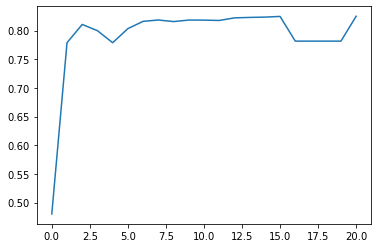

In [18]:
plt.plot(scores)

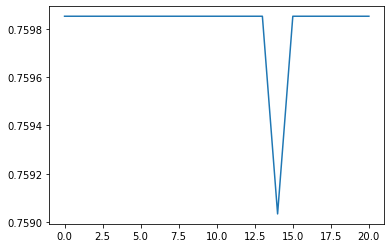

In [19]:
plt.plot(scoresn)

In [20]:
cmatricesn

[array([[7423,    0],
        [2346,    0]], dtype=int64),
 array([[7423,    0],
        [2346,    0]], dtype=int64),
 array([[7423,    0],
        [2346,    0]], dtype=int64),
 array([[7423,    0],
        [2346,    0]], dtype=int64),
 array([[7423,    0],
        [2346,    0]], dtype=int64),
 array([[7423,    0],
        [2346,    0]], dtype=int64),
 array([[7423,    0],
        [2346,    0]], dtype=int64),
 array([[7423,    0],
        [2346,    0]], dtype=int64),
 array([[7423,    0],
        [2346,    0]], dtype=int64),
 array([[7423,    0],
        [2346,    0]], dtype=int64),
 array([[7423,    0],
        [2346,    0]], dtype=int64),
 array([[7423,    0],
        [2346,    0]], dtype=int64),
 array([[7423,    0],
        [2346,    0]], dtype=int64),
 array([[7423,    0],
        [2346,    0]], dtype=int64),
 array([[7409,   14],
        [2340,    6]], dtype=int64),
 array([[7423,    0],
        [2346,    0]], dtype=int64),
 array([[7423,    0],
        [2346,    0]], dtype=int64

In [21]:
cmatrices = []
cmatricesn = []
scores = []
scoresn = []
for i in range(1, 30):
    pca = KernelPCA(n_components=i, kernel='poly')
    pcan = KernelPCA(n_components=i, kernel='poly')
    pca.fit(rain_x_tr[:5000])
    pcan.fit(rain_norm_x_tr[:5000])
    
    clf = lr(penalty='l2').fit(pca.transform(rain_x_tr), rain_y_tr)
    clfn = lr(penalty='l2').fit(pcan.transform(rain_norm_x_tr), rain_y_tr)
    
    cmatrices.append(cm(rain_y_te, clf.predict(pca.transform(rain_x_te))))
    cmatricesn.append(cm(rain_norm_y_te, clfn.predict(pcan.transform(rain_norm_x_te))))
    
    scores.append(clf.score(pca.transform(rain_x_te), rain_y_te))
    scoresn.append(clfn.score(pcan.transform(rain_norm_x_te), rain_norm_y_te))

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

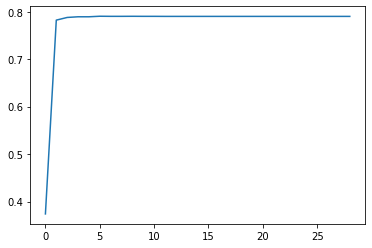

In [22]:
plt.plot(scores)

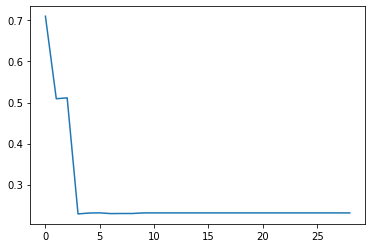

In [23]:
plt.plot(scoresn)

In [24]:
cmatrices = []
cmatricesn = []
scores = []
scoresn = []
for i in range(1, 22):
    pca = KernelPCA(n_components=i, kernel='rbf')
    pcan = KernelPCA(n_components=i, kernel='rbf')
    pca.fit(rain_x_tr[:5000])
    pcan.fit(rain_norm_x_tr[:5000])
    
    clf = lr(penalty='l2').fit(pca.transform(rain_x_tr), rain_y_tr)
    clfn = lr(penalty='l2').fit(pcan.transform(rain_norm_x_tr), rain_y_tr)
    
    cmatrices.append(cm(rain_y_te, clf.predict(pca.transform(rain_x_te))))
    cmatricesn.append(cm(rain_norm_y_te, clfn.predict(pcan.transform(rain_norm_x_te))))
    
    scores.append(clf.score(pca.transform(rain_x_te), rain_y_te))
    scoresn.append(clfn.score(pcan.transform(rain_norm_x_te), rain_norm_y_te))

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

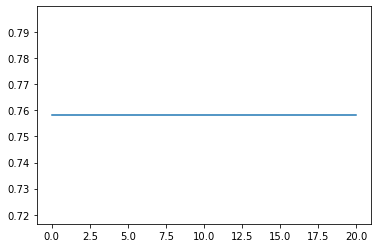

In [25]:
plt.plot(scores)

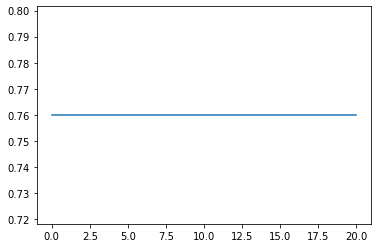

In [26]:
plt.plot(scoresn)